In [ ]:
!pip install ase

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.7 MB/s eta 0:00:00


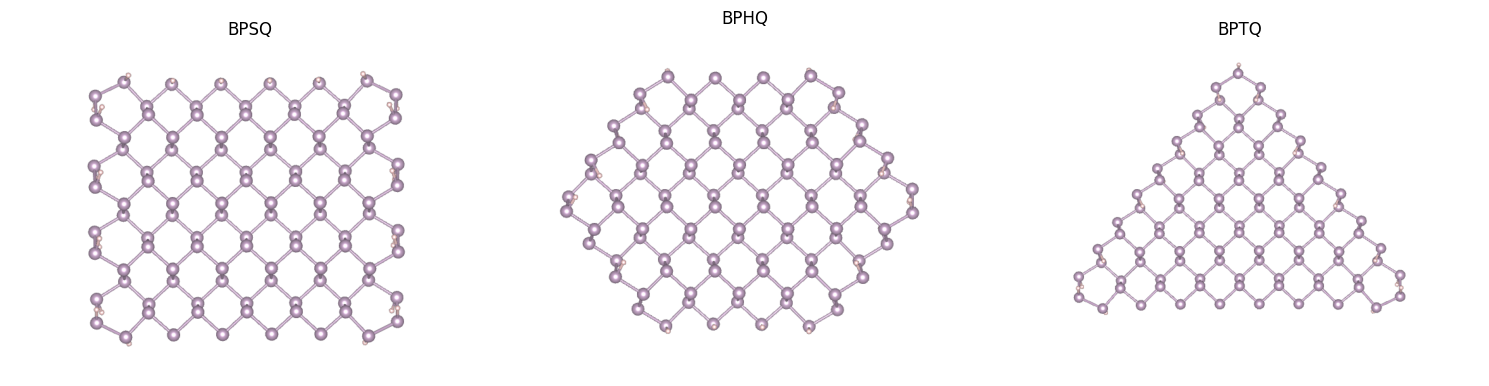

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Títulos para cada imagen
titles = ['BPSQ', 'BPHQ', 'BPTQ']

# Crear una figura con 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Leer y mostrar cada imagen con su título
for i, file_name in enumerate(titles):
    img = mpimg.imread(f"{file_name}-relaxed-lcao.png")
    axes[i].imshow(img)
    axes[i].set_title(titles[i])
    axes[i].axis('off')  # Ocultar ejes

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()
plt.savefig("quantum-dots.png")


In [ ]:
import pandas as pd

# Create separate dictionaries for each functional/phase combination
data_vdw_gas = {
    'PQD': ['BPSQ']*6 + ['BPHQ']*6 + ['BPTQ']*6,
    'Config': ['P51','P52','P53','P61','P62','P63']*3,
    'Functional': ['vdW-DF2']*18,
    'Phase': ['Gas']*18,
    'Energy': [
        -0.691, -0.696, -0.681, -0.668, -0.715, -0.618,  # BPSQ
        -0.668, -0.659, -0.649, -0.746, -0.654, -0.671,  # BPHQ
        -0.635, -0.621, -0.638, -0.709, -0.733, -0.661   # BPTQ
    ]
}

data_vdw_water = {
    'PQD': ['BPSQ']*6 + ['BPHQ']*6 + ['BPTQ']*6,
    'Config': ['P51','P52','P53','P61','P62','P63']*3,
    'Functional': ['vdW-DF2']*18,
    'Phase': ['Water']*18,
    'Energy': [
        -0.566, -0.547, -0.543, -0.646, -0.606, -0.583,
        -0.531, -0.517, -0.511, -0.629, -0.602, -0.578,
        -0.489, -0.452, -0.456, -0.557, -0.567, -0.534
    ]
}

data_dftd3_gas = {
    'PQD': ['BPSQ']*6 + ['BPHQ']*6 + ['BPTQ']*6,
    'Config': ['P51','P52','P53','P61','P62','P63']*3,
    'Functional': ['DFTD3']*18,
    'Phase': ['Gas']*18,
    'Energy': [
        -0.781, -0.757, -0.770, -0.862, -0.830, -0.759,
        -0.828, -0.676, -0.669, -0.799, -0.687, -0.762,
        -0.753, -0.719, -0.767, -0.910, -0.844, -0.847
    ]
}

data_dftd3_water = {
    'PQD': ['BPSQ']*6 + ['BPHQ']*6 + ['BPTQ']*6,
    'Config': ['P51','P52','P53','P61','P62','P63']*3,
    'Functional': ['DFTD3']*18,
    'Phase': ['Water']*18,
    'Energy': [
        -0.647, -0.606, -0.638, -0.782, -0.700, -0.707,
        -0.670, -0.587, -0.561, -0.686, -0.656, -0.695,
        -0.608, -0.561, -0.604, -0.751, -0.689, -0.706
    ]
}

# Combine all data
df = pd.concat([
    pd.DataFrame(data_vdw_gas),
    pd.DataFrame(data_vdw_water),
    pd.DataFrame(data_dftd3_gas),
    pd.DataFrame(data_dftd3_water)
], ignore_index=True)

# Verify
print(f"Total rows: {len(df)}")
print(df.head())

Total rows: 72
    PQD Config Functional Phase  Energy
0  BPSQ    P51    vdW-DF2   Gas  -0.691
1  BPSQ    P52    vdW-DF2   Gas  -0.696
2  BPSQ    P53    vdW-DF2   Gas  -0.681
3  BPSQ    P61    vdW-DF2   Gas  -0.668
4  BPSQ    P62    vdW-DF2   Gas  -0.715


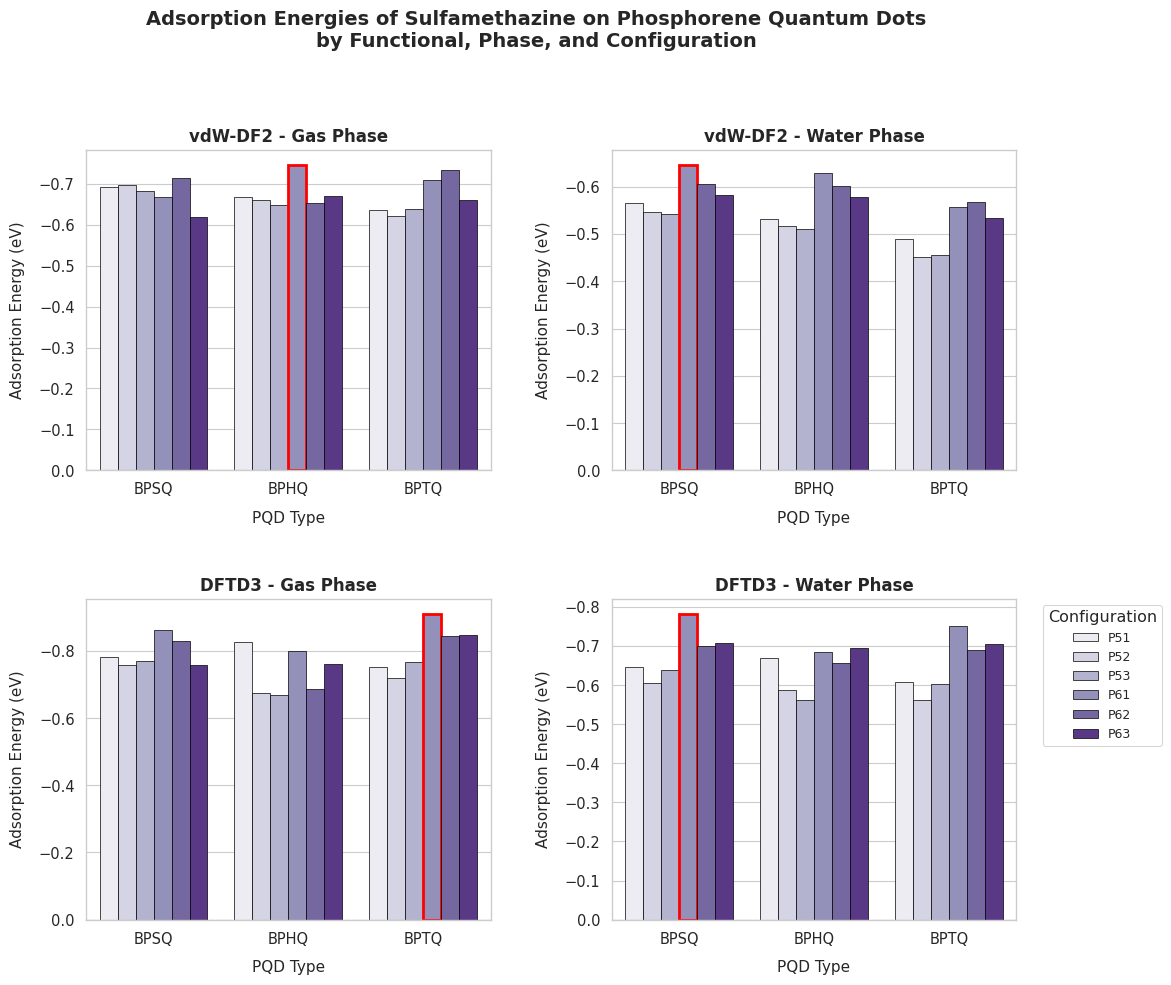

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Combine all data
df = pd.concat([
    pd.DataFrame(data_vdw_gas),
    pd.DataFrame(data_vdw_water),
    pd.DataFrame(data_dftd3_gas),
    pd.DataFrame(data_dftd3_water)
], ignore_index=True)

# Create a purple color palette for configurations
palette = sns.color_palette("Purples", n_colors=6)

# Set style
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'legend.fontsize': 9
})

# Create figure with 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Plot each combination
for (functional, phase), ax in zip([('vdW-DF2', 'Gas'), ('vdW-DF2', 'Water'),
                                   ('DFTD3', 'Gas'), ('DFTD3', 'Water')], axes.flat):

    subset = df[(df['Functional'] == functional) & (df['Phase'] == phase)]

    sns.barplot(
        data=subset,
        x='PQD',
        y='Energy (eV)',
        hue='Config',
        palette=palette,
        ax=ax,
        dodge=True,
        edgecolor='black',
        linewidth=0.5
    )

    # Flip y-axis so negative values go up
    ax.invert_yaxis()

    # Customize subplot
    ax.set_title(f"{functional} - {phase} Phase", fontweight='bold')
    ax.set_xlabel("PQD Type", labelpad=10)
    ax.set_ylabel("Adsorption Energy (eV)", labelpad=10)
    ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)

    # Highlight strongest adsorption
    min_energy = subset['Energy (eV)'].min()
    for bar in ax.patches:
        if np.isclose(bar.get_height(), min_energy, atol=0.001):
            bar.set_edgecolor('red')
            bar.set_linewidth(2)

    if ax != axes[1,1]:  # Only show legend on bottom right
        ax.get_legend().remove()
    else:
        ax.legend(
            title='Configuration',
            bbox_to_anchor=(1.05, 1),
            loc='upper left',
            frameon=True
        )

# Main title
fig.suptitle(
    "Adsorption Energies of Sulfamethazine on Phosphorene Quantum Dots\n"
    "by Functional, Phase, and Configuration",
    y=1.02,
    fontsize=14,
    fontweight='bold'
)

# Save
plt.savefig(
    "pqd_adsorption_energies_complete.png",  # Save as PNG
    dpi=300,                # High resolution
    bbox_inches='tight',    # Remove extra padding
    format='png'            # Explicit PNG format
)

plt.show()


<ipython-input-23-11ad300c4264>:9: FutureWarning: Please use atoms.calc
  calc = atoms.get_calculator()


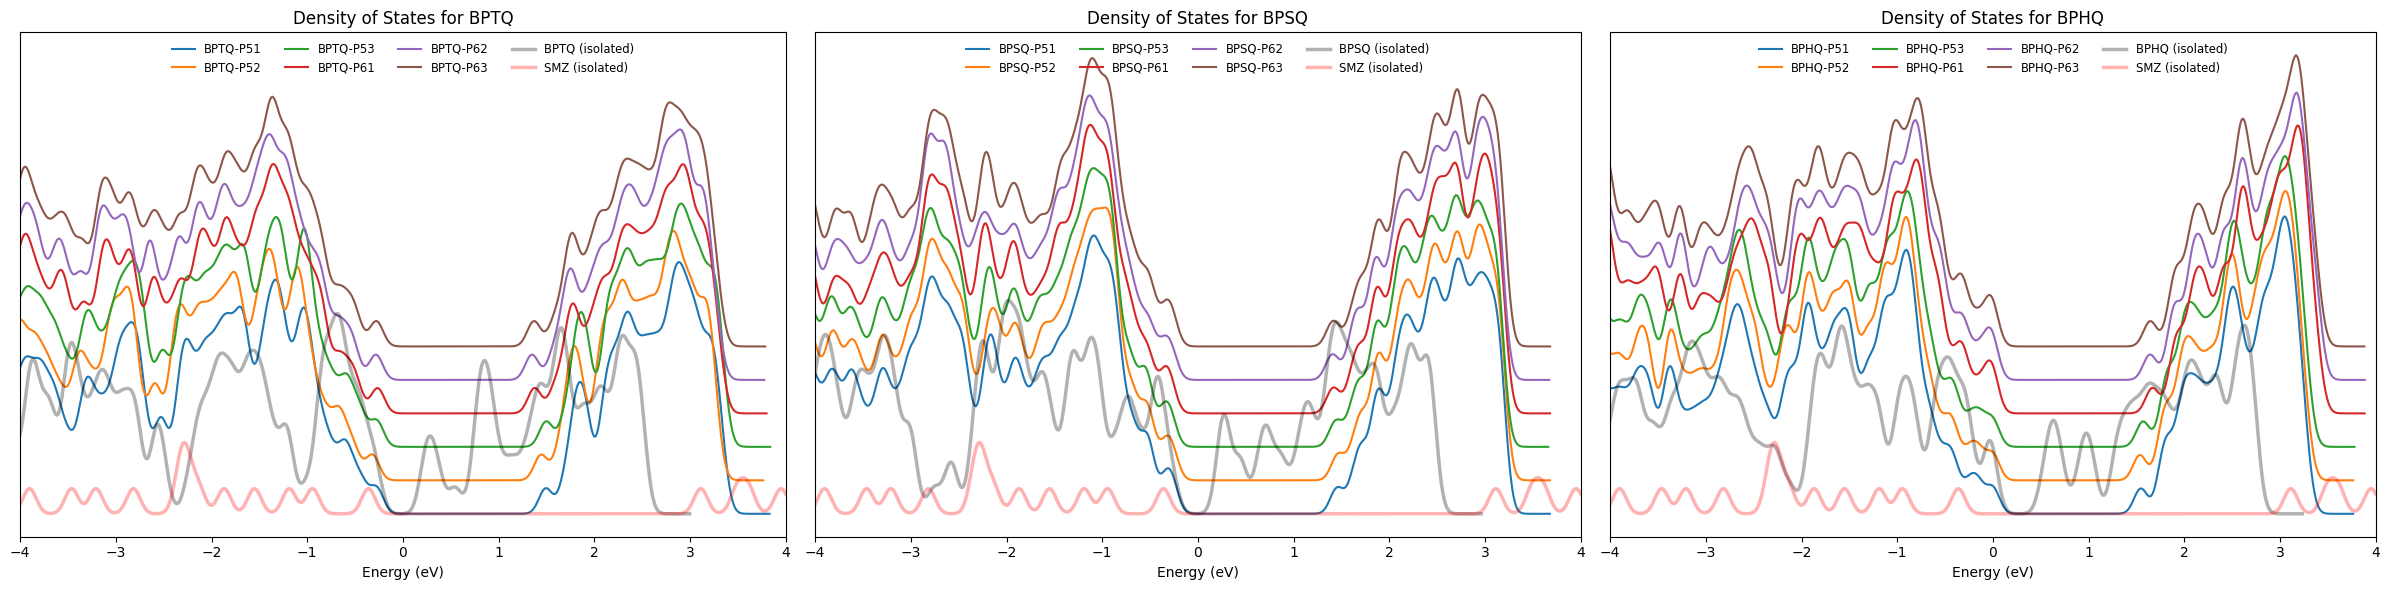

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ase.io import read
from ase.dft.dos import DOS

# Function to read .gpw files and get the density of states
def read_gpw_dos(filename):
    atoms = read(filename)
    calc = atoms.get_calculator()
    dos = DOS(calc, npts=2000, width=0.1)  # Adjust npts and width as necessary
    energies = dos.get_energies()
    densities = dos.get_dos()
    return energies, densities

# Define quantum dots and positions
quantum_dots = ["BPTQ", "BPSQ", "BPHQ"]
positions = ["P51", "P52", "P53", "P61", "P62", "P63"]

# Load isolated quantum dots
isolated_data = {}
for qd in quantum_dots:
    filename = f"{qd}-gs-lcao.gpw"
    energies, densities = read_gpw_dos(filename)
    isolated_data[qd] = (energies, densities)

# Load isolated SMZ
smz_energies, smz_densities = read_gpw_dos("SMZ-gs-lcao.gpw")

# Load QD+SMZ configurations
data = {qd: {} for qd in quantum_dots}
for qd in quantum_dots:
    for pos in positions:
        filename = f"{qd}-{pos}-gs-lcao.gpw"
        energies, densities = read_gpw_dos(filename)
        data[qd][pos] = (energies, densities)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(24, 6), sharey=True)
spacing = 15  # Increase spacing to prevent overlap

for idx, qd in enumerate(quantum_dots):
    ax = axs[idx]

    # Plot the 6 QD+SMZ configurations with vertical shift
    for pos_idx, pos in enumerate(positions):
        energies, densities = data[qd][pos]
        ax.plot(energies, densities + pos_idx * spacing, label=f"{qd}-{pos}")

    # Plot isolated quantum dot (transparent, no shift)
    iso_energies, iso_densities = isolated_data[qd]
    ax.plot(
        iso_energies, iso_densities,
        color='black', linewidth=2.5, label=f"{qd} (isolated)", alpha=0.3
    )

    # Plot isolated SMZ (transparent, no shift)
    ax.plot(
        smz_energies, smz_densities,
        color='red',  linewidth=2.5, label="SMZ (isolated)", alpha=0.3
    )
    ax.set_xlim(-4, 4)
    ax.set_yticks([])
    ax.set_title(f"Density of States for {qd}")
    ax.set_xlabel("Energy (eV)")
    ax.legend(loc='upper center', ncol=4, fontsize='small', frameon=False)

plt.tight_layout()
plt.show()
plt.savefig("dos-plot.png")
plt.close()
